### Part 2: Scrape and Analyse Mars Weather Data

In [287]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import json
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt


In [288]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.68M/6.68M [00:02<00:00, 3.36MB/s]


In [289]:
# Mars News Site to Scrape
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Let it sleep for 1 second
#time.sleep(1)

In [290]:
# Return all the HTML on page
html = browser.html

# Create a Beautiful Soup object, pass in our HTML, and call 'html.parser'
soup = BeautifulSoup(html, 'html.parser')

In [291]:
rows = soup.find_all('tr', class_='data-row')
mars_weather = []
for x in rows:
    td = x.find_all('td')
    row = [col.text for col in td] #list comprehension
    mars_weather.append(row)

In [292]:
mars_weather

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [293]:
df = pd.DataFrame(mars_weather, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure'])
print(df.head())
print("-------------------------------------------------------------")
print(df.dtypes)

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0
-------------------------------------------------------------
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [294]:
df1 = df.astype({ 'id': 'int', 
            'terrestrial_date': 'datetime64',
            'sol': 'int',
            'ls': 'int',
            'month': 'int',
            'min_temp': 'float',
            'pressure': 'float'})
            
df1.dtypes


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [295]:
browser.quit()

In [296]:
# Question 1: how many months are there on Mars?
month_count = df1['month'].nunique()
print("The Number of Months on Mars is:",month_count, "months" )

The Number of Months on Mars is: 12 months


In [297]:
# Question 2: how many Martian (not Earth) days' worth of data are there in the scraped dataset?
days = df1['sol'].nunique()
print("The Number of Martian Days of data collected is:",days, "days" )

The Number of Martian Days of data collected is: 1867 days


In [298]:
# Question 3: what are the coldest and warmest months on Mars (at the location of Curiosity)? Obtain the answer by averaging the minimum daily temperature of each month. Plot the results as a bar plot.
index_month = df1.set_index('month')
index_month_gr = index_month.groupby(["month"]).mean()
print(index_month_gr)

coldest_month = index_month_gr['min_temp'].min()
warmest_month = index_month_gr['min_temp'].max()
print("Coldest_month =", coldest_month,"°C")
print("Warmest_month =", warmest_month,"°C")

                id          sol          ls   min_temp    pressure
month                                                             
1      1013.873563  1077.574713   15.281609 -77.160920  862.488506
2      1109.882022  1175.853933   44.258427 -79.932584  889.455056
3      1132.697917  1204.406250   75.010417 -83.307292  877.322917
4      1175.164948  1244.500000  104.365979 -82.747423  806.329897
5      1115.033557  1182.691275  132.885906 -79.308725  748.557047
6       735.306122   750.829932  164.897959 -75.299320  745.054422
7       714.549296   715.105634  194.894366 -72.281690  795.105634
8       718.078014   795.333333  224.347518 -68.382979  873.829787
9       785.843284   861.186567  254.052239 -69.171642  913.305970
10      955.723214  1034.669643  286.330357 -71.982143  887.312500
11      874.246377   947.224638  314.536232 -71.985507  857.014493
12      931.602410   990.951807  344.692771 -74.451807  842.156627
Coldest_month = -83.30729166666667 °C
Warmest_month = -68.3829

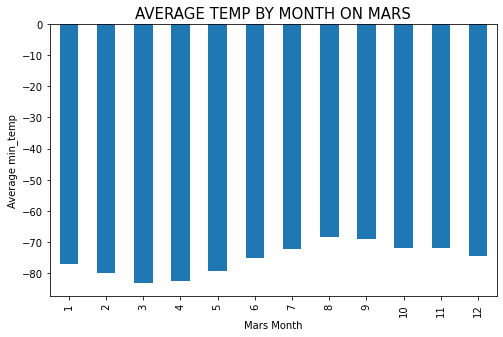

<Figure size 432x288 with 0 Axes>

In [299]:

avg_min_temp = index_month_gr[["min_temp"]]
avg_min_temp.plot(kind="bar", figsize=(8, 5), legend = False)

plt.title(("AVERAGE TEMP BY MONTH ON MARS"),fontsize=15)
plt.ylabel("Average min_temp")
plt.xlabel("Mars Month")
plt.show()
plt.tight_layout()

In [300]:
# Q3 Answers.
# The coldest month on mars is month 3 with an average of -83.3°C &
# the warmest month on mars is month 8 with an average of -68.4°C

-----------------------------------------------------------------------

In [301]:
# Question 4: Answer the following question: which months have the lowest and highest atmospheric pressure on Mars? Obtain the answer by averaging the daily atmospheric pressure of each month. Plot the results as a bar plot.
print(index_month_gr)

highest_pressure_month = index_month_gr['pressure'].max()
lowest_pressure_month = index_month_gr['pressure'].min()
print("Highest_Pressure_Month =", highest_pressure_month)
print("Lowest_Pressure_Month =", lowest_pressure_month)

                id          sol          ls   min_temp    pressure
month                                                             
1      1013.873563  1077.574713   15.281609 -77.160920  862.488506
2      1109.882022  1175.853933   44.258427 -79.932584  889.455056
3      1132.697917  1204.406250   75.010417 -83.307292  877.322917
4      1175.164948  1244.500000  104.365979 -82.747423  806.329897
5      1115.033557  1182.691275  132.885906 -79.308725  748.557047
6       735.306122   750.829932  164.897959 -75.299320  745.054422
7       714.549296   715.105634  194.894366 -72.281690  795.105634
8       718.078014   795.333333  224.347518 -68.382979  873.829787
9       785.843284   861.186567  254.052239 -69.171642  913.305970
10      955.723214  1034.669643  286.330357 -71.982143  887.312500
11      874.246377   947.224638  314.536232 -71.985507  857.014493
12      931.602410   990.951807  344.692771 -74.451807  842.156627
Highest_Pressure_Month = 913.3059701492538
Lowest_Pressure_Mon

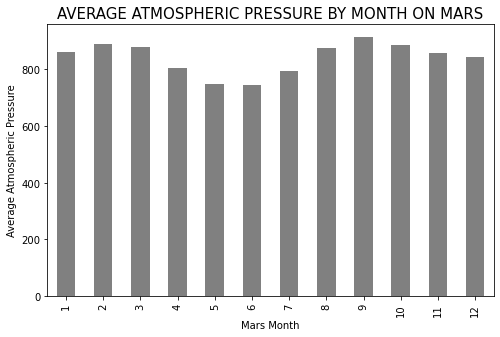

<Figure size 432x288 with 0 Axes>

In [302]:

avg_atm_press = index_month_gr[["pressure"]]
avg_atm_press.plot(kind="bar", figsize=(8, 5), legend = False, color= 'grey')

plt.title(("AVERAGE ATMOSPHERIC PRESSURE BY MONTH ON MARS"),fontsize=15)
plt.ylabel("Average Atmospheric Pressure")
plt.xlabel("Mars Month")
plt.show()
plt.tight_layout()


In [303]:
# Q4 Answers.
# Month 9 has the highest average pressure on mars with an average of 913.3 &
# Month 6 has the lowest average pressure on mars with an average of 745.0.

-----------------------------------------------------------------------

First Earth date of data recording: 2012-08-16 00:00:00
Last Earth date of data recording: 2018-02-27 00:00:00
No of earth days the dataset was recoreded over : 2021 days 00:00:00


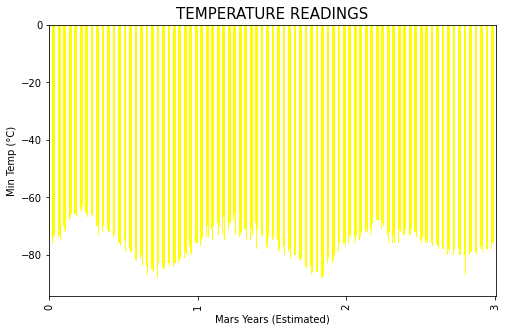

In [304]:
# Question 5: approximately how many terrestrial (earth) days are there in a Martian year? In other words, in the time that Mars circles the Sun once, how many days elapse on the Earth? Estimate the result visually by plotting the daily minimum temperature.
start_date_earth = df1['terrestrial_date'].min()
end_date_earth = df1['terrestrial_date'].max()
print("First Earth date of data recording:",start_date_earth)
print("Last Earth date of data recording:",end_date_earth)
print("No of earth days the dataset was recoreded over :",end_date_earth-start_date_earth) 


min_temp = df1[["min_temp"]]
min_temp.plot(kind="bar", figsize=(8, 5), legend = False, color= 'yellow')

plt.title(("TEMPERATURE READINGS"),fontsize=15)
plt.ylabel("Min Temp (°C)")
plt.xlabel("Mars Years (Estimated)")
plt.locator_params(axis='x', nbins=3.01)
plt.show()
#plt.tight_layout()

In [305]:
# Q5 Answer.
# The dataset was measured over 2021 days or approximatly 5.537 earth years.  
# Looking at the above tempature data it could be interpreted that 1 Earth years equates 
# to approximatly 3 Mars years, or 673 Mars days. 
#          i.e.    5.537 / 3 = 1.846
#                  1.846 * 365 earth days = 673 mars days.    

In [306]:
# Export the DataFrame to a CSV file.
df.to_csv("mars_weather.csv",
    encoding="utf-8", index=False, header=True)  